In [17]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [19]:
# Параметры модели
n = 15  # Размер квадрата n x n
blue_percentage = 0.45
red_percentage = 0.45
empty_percentage = 0.10
threshold = 2  # Порог счастья
steps = 20  # Количество шагов моделирования

In [21]:
# Инициализация поля
def initialize_grid(n, blue_percentage, red_percentage, empty_percentage):
    grid = np.zeros((n, n), dtype=int)
    total_cells = n * n
    blue_cells = int(total_cells * blue_percentage)
    red_cells = int(total_cells * red_percentage)
    empty_cells = total_cells - blue_cells - red_cells

    cells = [1] * blue_cells + [2] * red_cells + [0] * empty_cells
    random.shuffle(cells)

    grid = np.array(cells).reshape(n, n)
    return grid

In [23]:
# Проверка счастья клетки
def is_happy(grid, x, y, threshold):
    color = grid[x, y]
    if color == 0:  # Пустая клетка всегда счастлива
        return True

    neighbors = []
    for i in range(-1, 2):
        for j in range(-1, 2):
            if i == 0 and j == 0:
                continue
            if 0 <= x + i < n and 0 <= y + j < n:
                neighbors.append(grid[x + i, y + j])

    same_color_neighbors = sum(1 for neighbor in neighbors if neighbor == color)
    return same_color_neighbors >= threshold

In [25]:
# Моделирование
def simulate(grid, steps, threshold):
    for step in range(steps):
        unhappy_cells = [(x, y) for x in range(n) for y in range(n) if
                         not is_happy(grid, x, y, threshold) and grid[x, y] != 0]
        if not unhappy_cells:
            print(f"Все клетки счастливы после {step} шагов.")
            break

        x, y = random.choice(unhappy_cells)
        empty_cells = [(i, j) for i in range(n) for j in range(n) if grid[i, j] == 0]
        if empty_cells:
            new_x, new_y = random.choice(empty_cells)
            grid[new_x, new_y] = grid[x, y]
            grid[x, y] = 0

        if step % 10 == 0:
            plot_grid(grid, step, threshold)

In [27]:
# Визуализация
def plot_grid(grid, step, threshold):
    # Создаем матрицу цветов для визуализации
    color_grid = np.zeros((n, n, 3))  # RGB матрица

    for i in range(n):
        for j in range(n):
            if grid[i, j] == 0:
                color_grid[i, j] = [1, 1, 1]  # Белый для пустых клеток
            elif is_happy(grid, i, j, threshold):
                color_grid[i, j] = [0, 0, 1]  # Синий для счастливых
            else:
                color_grid[i, j] = [1, 0, 0]  # Красный для несчастливых

    # Отображаем матрицу с цветами
    plt.imshow(color_grid)
    plt.title(f"Шаг {step}")
    plt.axis('off')
    plt.show()

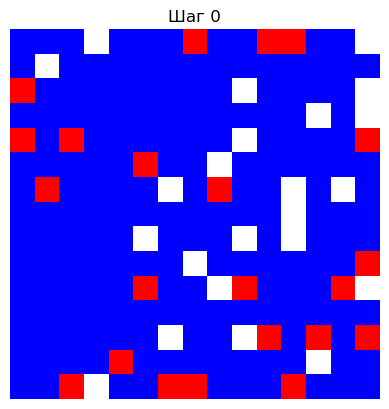

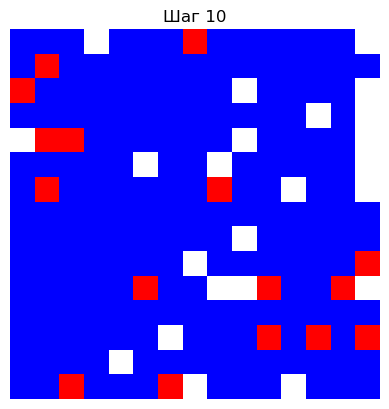

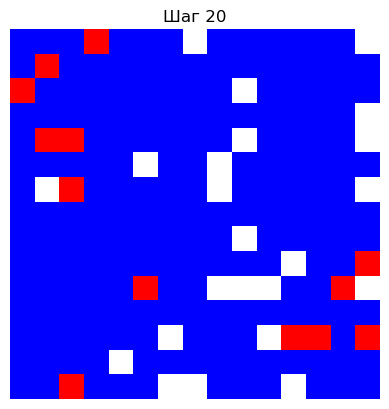

In [29]:
# Инициализация и запуск моделирования
grid = initialize_grid(n, blue_percentage, red_percentage, empty_percentage)
simulate(grid, steps, threshold)
plot_grid(grid, steps, threshold)